In [13]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np

from testsuite.surrogates import GP, MultiSurrogate
from testsuite.directed_optimisers import DmVector
from testsuite.utilities import Pareto_split

import wfg

In [15]:
# setup function
n_obj = 4  # Number of objectives
kfactor = 4
lfactor = 4
k = kfactor * (n_obj - 1)  # position related params
l = lfactor * 2  # distance related params
n_dim = k + l
limits = np.zeros((2, n_dim))
limits[1] = np.array(range(1, n_dim + 1)) * 2

func = wfg.WFG5
gp_surr_multi = MultiSurrogate(GP, scaled=True)
# gp_surr_mono = GP(scaled=True)

def test_function(x):
    if x.ndim < 2:
        x = x.reshape(1, -1)
    return np.array([func(xi, k, n_obj) for xi in x])

In [16]:
dmv = np.array([1., 1.5, 1.5, 2.]).reshape(1, -1)

In [17]:
surrogate = MultiSurrogate(GP)
opt = DmVector(objective_function=test_function, ei=False, w=0.5, limits=limits, surrogate=gp_surr_multi, n_initial=100, budget=25, seed=10, cmaes_restarts=0, dmv=dmv)

In [19]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(*opt.d.T, c="C0")
ax.scatter(*opt.p.T, c="C1")
ax.scatter(*opt.targets.T, c="C3", alpha=0.2, s=150)
ax.plot(*np.vstack((np.zeros_like(dmv), dmv*3)).T, c="C1", linestyle="--")

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:838: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:840: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


IndexError: invalid index to scalar variable.

AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

<Figure size 432x288 with 1 Axes>

In [9]:
new_points = np.vstack((opt.y, np.random.uniform(1, 4, (40, 2))))
opt.p, opt.d = Pareto_split(new_points)

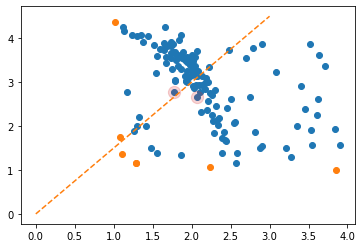

In [10]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(*opt.d.T, c="C0")
ax.scatter(*opt.p.T, c="C1")
ax.scatter(*opt.targets.T, c="C3", alpha=0.2, s=150)
ax.plot(*np.vstack((np.zeros_like(dmv), dmv*3)).T, c="C1", linestyle="--")

In [21]:
%%time
opt.update_targets()

CPU times: user 20min 49s, sys: 1.08 s, total: 20min 50s
Wall time: 20min 56s


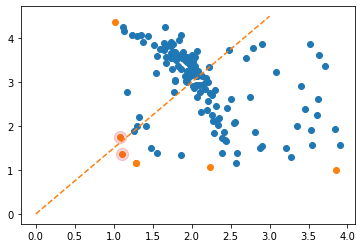

In [12]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(*opt.d.T, c="C0")
ax.scatter(*opt.p.T, c="C1")
ax.scatter(*opt.targets.T, c="C3", alpha=0.2, s=150)
ax.plot(*np.vstack((np.zeros_like(dmv), dmv*3)).T, c="C1", linestyle="--")